<a href="https://colab.research.google.com/github/mehmetemeklii/UrbanSounds/blob/main/DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [329]:
from google.colab import drive
from imutils import paths
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/UrbanSounds' #drive içerisinde datanın bulunduğu yol
imagepath = list(paths.list_images(path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import os
rev_image_list = []
rev_image_class_list=[]
for i in range(10):
  path = f"/content/drive/MyDrive/Colab Notebooks/DeepLearning/UrbanSounds/{i}/"
  image_name_list =[]
  filenames = os.listdir(path)
  for files in filenames:
    image_name_list.append(files)
  for ax in range(len(image_name_list)):
    image = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/DeepLearning/UrbanSounds/{i}/{image_name_list[ax]}')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sunset_resized= cv2.resize(gray_image, dsize=(32, 32))
    sunset_resized = sunset_resized/255
    rev_image_list.append(sunset_resized)  
    rev_image_class_list.append(i)


In [331]:
from sklearn.model_selection import train_test_split
x_label = np.array(rev_image_list)
y_label =np.array(rev_image_class_list)

x_train, x_temporary,y_train,y_temporary = train_test_split(x_label,y_label,train_size=0.8)
x_val,x_test,y_val,y_test = train_test_split(x_temporary,y_temporary,test_size=0.5)
#Reshape durumu


x_train=x_train.reshape(-1,32,32,1)
x_val = x_val.reshape(-1,32,32,1)
x_temporary=x_temporary.reshape(-1,32,32,1)
x_test=x_test.reshape(-1,32,32,1)

In [332]:
# np.save("/content/drive/MyDrive/Colab Notebooks/DeepLearning/UrbanSounds/y_train", x_train)

In [333]:
#EXPORT
result = x_train.reshape(1,-1).T
result_2 = y_train.reshape(1,-1).T
result_3 =x_temporary.reshape(1,-1).T
result_4 =y_temporary.reshape(1,-1).T
result_5 =x_val.reshape(1,-1).T
result_6 =x_test.reshape(1,-1).T
result_7 =y_val.reshape(1,-1).T
result_8 =y_test.reshape(1,-1).T
df_1 = pd.DataFrame(result,columns=['x_train'])
df_2=pd.DataFrame(result_2,columns=['y_train'])
df_3 = pd.DataFrame(result_3,columns=['x_temporary'])
df_4=pd.DataFrame(result_4,columns=['y_temporary'])
df_5 = pd.DataFrame(result_5,columns=['x_val'])
df_6=pd.DataFrame(result_6,columns=['x_test'])
df_7 = pd.DataFrame(result_7,columns=['y_val'])
df_8=pd.DataFrame(result_8,columns=['y_test'])
dataset=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8],axis=1)
dataset

,x_train,y_train,x_temporary,y_temporary,x_val,x_test,y_val,y_test
0,0.062745,5.0,0.0,1.0,0.031373,0.0,4.0,1.0
1,0.066667,0.0,0.0,3.0,0.101961,0.0,2.0,9.0
2,0.105882,2.0,0.0,9.0,0.074510,0.0,8.0,9.0
3,0.039216,8.0,0.0,3.0,0.105882,0.0,6.0,2.0
4,0.086275,8.0,0.0,5.0,0.082353,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7152635,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7152636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7152637,0.003922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7152638,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
#Model Oluşturma
import tensorflow as tf
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout((0.5)))

model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout((0.5)))

model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [335]:
result = model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 1s 11ms/step - loss: 2.1266 - accuracy: 0.2082 - val_loss: 1.8352 - val_accuracy: 0.3345
Epoch 2/50
55/55 [==============================] - 0s 9ms/step - loss: 1.8305 - accuracy: 0.3104 - val_loss: 1.5518 - val_accuracy: 0.4170
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 1.6509 - accuracy: 0.3950 - val_loss: 1.4078 - val_accuracy: 0.5246
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 1.5153 - accuracy: 0.4492 - val_loss: 1.2694 - val_accuracy: 0.5727
Epoch 5/50
55/55 [==============================] - 0s 8ms/step - loss: 1.3992 - accuracy: 0.4965 - val_loss: 1.1795 - val_accuracy: 0.5773
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 1.3107 - accuracy: 0.5394 - val_loss: 1.0528 - val_accuracy: 0.6449
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 1.2245 - accuracy: 0.5676 - val_loss: 1.0146 - val_accuracy: 0.6770
Epoch 8/50
55/55 [============

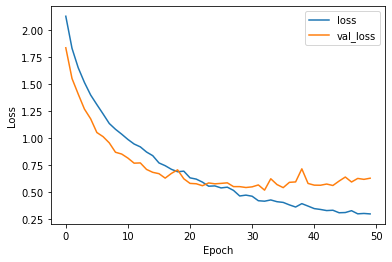

In [336]:
plt.plot(result.history['loss'],label='loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



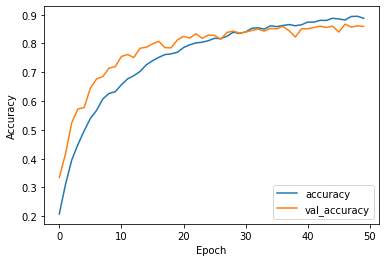

In [337]:
plt.plot(result.history['accuracy'],label='accuracy')
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [341]:
prediction_result=model.predict(x_test[789].reshape(-1,32,32))
prediction_result

array([[1.92641735e-03, 3.44374770e-04, 3.35009806e-02, 6.85540494e-04,
        8.65221155e-05, 8.82730455e-05, 3.86807983e-07, 1.05072795e-05,
        6.81291043e-04, 9.62675750e-01]], dtype=float32)

In [342]:
predicted_class=prediction_result.argmax()
predicted_probability=prediction_result.max()
y_test[789]

9

In [343]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability % ")

This image belongs to class 9 with 0.9626757502555847 probability % 
